In [15]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

from pprint import pprint
from pathlib import Path

In [3]:
tc = pd.read_csv('./Data/TenthCircuit.csv', sep=',')
tc.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII


# Описание данных

- Title — название дела, рассматриваемого в суде
- Date — дата вынесения решения
- Issue — номер заседания
- Judge1, Judge2, Judge3 — имена судей
- Vote1, Vote2, Vote3 — голос судьи (либеральный = 1, консервативный = 0)
- Category — категория дела

## Задания

### Какой график лучше всех подойдет для визуализации тренда суммарного количества всех рассмотренных дел за каждый год? 
Выберите один верный ответ.

- [x] Линейный график

### Укажите, верно ли следующее утверждение: для визуализации суммарного количества дел по каждой категории (переменная Category) подойдет столбчатая диаграмма..

### Выберите только те наблюдения, где все судьи голосовали одинаково. Постройте столбчатую диаграмму для суммарного количества заседаний по каждой категории и определите, каких заседаний и в какой категории дел больше — тех, где судьи голосовали либерально, или тех, где голоса были консервативны. 
Выберите один верный ответ.

In [18]:
df_f = tc.loc[tc[['Vote1', 'Vote2', 'Vote3']].sum(axis=1).isin([0, 3])]
df_f['Votes'] = np.where(df_f[['Vote1', 'Vote2', 'Vote3']].sum(axis=1) == 3, 'Liberal', 'Conserv')

C:\Users\koryagin.an\AppData\Local\Temp\ipykernel_4932\4229431725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Votes'] = np.where(df_f[['Vote1', 'Vote2', 'Vote3']].sum(axis=1) == 3, 'Liberal', 'Conserv')


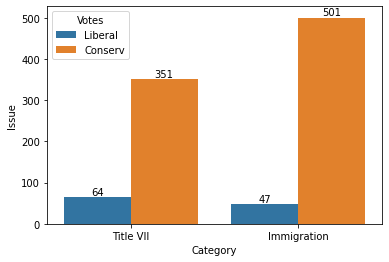

In [25]:
ax = sns.barplot(x='Category', y='Issue', hue='Votes', data=df_f, errwidth=0, estimator=np.sum)
for i in ax.containers:
    ax.bar_label(i,)

- [x] В обеих категориях больше заседаний, где судьи голосовали консервативно.
- [ ] В обеих категориях больше заседаний, где судьи голосовали либерально.
- [ ] В категории Title VII больше заседаний, где судьи голосовали консервативно, в категории Immigration, наоборот, — либерально.
- [ ] В категории Title VII больше заседаний, где судьи голосовали либерально, в категории Immigration, наоборот, — консервативно.

### Выберите заседания только за 2016 год. Постройте линейный график и определите, в каких месяцах наблюдались пиковые значения по числу заседаний. 
Будьте внимательны — даты записаны в формате месяц/день/год. Выберите один верный ответ.

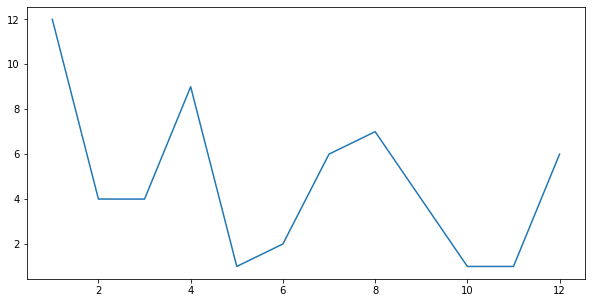

In [74]:
df_2016 = tc.copy()
df_2016['Date'] = pd.to_datetime(df_2016['Date'], format='%m/%d/%y')
df_2016 = df_2016[df_2016['Date'].dt.year == 2016]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_2016.groupby(df_2016['Date'].dt.month)['Issue'].sum());

- [ ] январь и март
- [ ] март и декабрь
- [x] январь и апрель
- [ ] май и июнь

### Укажите, верно ли следующее утверждение: для переменных, обозначающих число заседаний и их категорию, можно построить интерпретируемую диаграмму рассеяния.

### Используя исходные данные, определите среднее число заседаний за каждый сезон (зима, весна, лето, осень). 
Постройте столбчатую диаграмму, определите месяц с наибольшим показателем. Будьте внимательны — даты записаны в формате месяц/день/год. 
Введите ответ в виде слова (например, осень).

In [75]:
df_seas = tc.copy()

In [77]:
df_seas['Date'] = pd.to_datetime(df_seas['Date'], format='%m/%d/%y')

In [ ]:
{
    1: "Winter",
    2: "Winter",
    3: "Winter",
: "Winter",
1: "Winter",
1: "Winter",
1: "Winter",
1: "Winter",
1: "Winter",

}

In [87]:
def get_season(x):
    month = x
    if month in [1,2,12]:
        s = 'Winter'
    elif month in [3,4,5]:
        s = 'Spring'
    elif month in [6,7,8]:
        s = 'Summer'
    elif month in [10,11,9]:
        s = 'Autumn'
    return s


df_seas = df_seas.assign(season=df_seas['Date'].apply(get_season))

UnboundLocalError: local variable 's' referenced before assignment

In [86]:
df_seas.groupby(['season', df_seas['Date'].dt.month])['Issue'].sum()

season  Date
Autumn  1       101
        2        85
        3        79
        4        95
        5        69
        6        81
        7        89
        8       101
        9        63
        10       81
        11       57
        12       90
Name: Issue, dtype: int64

In [84]:
fig, ax = plt.subplots(figsize=(10,6))  # указываем размер графика
ax.bar(x=month_weather.index, height=month_weather, color='orange');

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,season
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,Autumn
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,Autumn
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,Autumn
3,Dye v. Moniz,2016-12-06,1,Lucero,Holmes,Moritz,0,0,0,Title VII,Autumn
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
949,Haimour v. Gonzales,2006-01-31,1,Henry,McKay,Murphy,0,0,0,Immigration,Autumn
950,Infanzon v. Gonzales,2006-01-24,1,Henry,McKay,Murphy,0,0,0,Immigration,Autumn
951,Otero v. Gonzales,2006-01-24,1,Tymkovich,Porfilio,Baldock,0,0,0,Immigration,Autumn
952,Infanzon v. Comfort,2006-01-18,1,Briscoe,Lucero,Murphy,0,0,0,Immigration,Autumn


In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(df_seas.loc['Autumn'], color='orange')
ax.bar(df_seas.loc['Winter'], color='blue')
ax.bat(df_seas.loc['Spring'], color='green')
ax.bar(df_seas.loc['Summer'], color='red')
ax.legend(['Autumn', 'Winter', 'Spring', 'Summer'], frameon=False)
plt.show()